In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch, add_image
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import os

In this example we use data from [StatsBomb](https://statsbomb.com/es/) using the [statsbombpy](https://github.com/statsbomb/statsbombpy) library. As you can see in the following box where the images are called, we will deal with the Spanish women's national team in the World Cup, specifically the 2023 World Cup where they were champions.

In [2]:
path='C:\\Users\\lal99\\PROYECTOS\\FUTBOL\\LOGOS\\'
spain = plt.imread(path+"Spain_National_Football_Team_badge.png")
worldcup=nwsl = plt.imread(path+"FIFA_Women's_World_Cup.png")

In [3]:
free_comps=sb.competitions()
mundial_2023=sb.matches(competition_id=72, season_id=107)

In [4]:
# This command looks at the columns that exist in this set of matches.

mundial_2023.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [5]:
# This command looks at the columns of actions that exist in a match.

sb.events(match_id=mundial_2023['match_id'][0]).columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging'

In [6]:
# The matches of the Spanish national team are selected, it must be taken into account that they do not always play as locals
# so we have to consider both cases

matches_spa=mundial_2023[(mundial_2023['home_team']=="Spain Women's")|(mundial_2023['away_team']=="Spain Women's")]

Then a code is made to obtain the data of all the matches and an action is chosen, in this case the passes:

In [7]:
df_spa=pd.DataFrame()
match_ids=list(matches_spa.match_id.values)
for match in match_ids:
    matches=sb.events(match_id=match)
    passes=matches[matches['type']=='Pass']
    df_spa=pd.concat([df_spa,passes])

In [8]:
# The position has 2 coordinates that are separated, in addition it has to be done for the start and end position. 

df_spa[['x', 'y']] = df_spa['location'].apply(pd.Series)
df_spa[['pass_end_x', 'pass_end_y']] = df_spa['pass_end_location'].apply(pd.Series)

In [9]:
# Now you have to filter out the passes that correspond only to the team you want to analyse.

pases_espana=df_spa[(df_spa["team"]=="Spain Women's")]

# The following command gives which players have done the action

pases_espana['player'].unique()

array(['Olga  Carmona García', 'Teresa Abelleira Dueñas',
       'Jennifer Hermoso Fuentes', 'Catalina Thomas Coll Lluch',
       'Irene Paredes Hernandez', 'Laia Codina Panedas',
       'María Francesca Caldentey Oliver', 'Ona Batlle Pascual',
       'Alba María Redondo Ferrer', 'Aitana Bonmati Conca',
       'Salma Paralluelo Ayingono', 'Oihane Hernández Zurbano',
       'Ivana Andrés Sanz', 'Alexia Putellas Segura', 'Eva Maria Navarro',
       'Esther Gonzalez Rodríguez', 'María Isabel Rodríguez Rivero',
       'Irene Guerrero Sanmartín', 'Athenea del Castillo Belvide',
       'Rocío Gálvez Luna', 'Claudia  Zornoza Sánchez', 'María Pérez'],
      dtype=object)

In [10]:
# As can be seen, the full names of the players are given, but for the personal preference analysis, the names of the 
# players are change because of how they know each other. In this case there is one that does not need to be changed.

pases_espana['player'] = pases_espana['player'].replace(['Olga  Carmona García'],'Olga Carmona')
pases_espana['player'] = pases_espana['player'].replace(['Teresa Abelleira Dueñas'],'Tere Abelleira')
pases_espana['player'] = pases_espana['player'].replace(['Jennifer Hermoso Fuentes'],'Jenni Hermoso')
pases_espana['player'] = pases_espana['player'].replace(['Catalina Thomas Coll Lluch'],'Cata Coll')
pases_espana['player'] = pases_espana['player'].replace(['Irene Paredes Hernandez'],'Irene Paredes')
pases_espana['player'] = pases_espana['player'].replace(['Laia Codina Panedas'],'Laia Codina')
pases_espana['player'] = pases_espana['player'].replace(['María Francesca Caldentey Oliver'],'Mariona')
pases_espana['player'] = pases_espana['player'].replace(['Ona Batlle Pascual'],'Ona Batlle')
pases_espana['player'] = pases_espana['player'].replace(['Alba María Redondo Ferrer'],'Alba Redondo')
pases_espana['player'] = pases_espana['player'].replace(['Aitana Bonmati Conca'],'Aitana Bonmati')
pases_espana['player'] = pases_espana['player'].replace(['Salma Paralluelo Ayingono'],'Salma Paralluelo')
pases_espana['player'] = pases_espana['player'].replace(['Oihane Hernández Zurbano'],'Oihane Hernández')
pases_espana['player'] = pases_espana['player'].replace(['Ivana Andrés Sanz'],'Ivana Andrés')
pases_espana['player'] = pases_espana['player'].replace(['Alexia Putellas Segura'],'Alexia Putellas')
pases_espana['player'] = pases_espana['player'].replace(['Eva Maria Navarro'],'Eva Navarro')
pases_espana['player'] = pases_espana['player'].replace(['Esther Gonzalez Rodríguez'],'Esther Gonzalez')
pases_espana['player'] = pases_espana['player'].replace(['María Isabel Rodríguez Rivero'],'Misa')
pases_espana['player'] = pases_espana['player'].replace(['Irene Guerrero Sanmartín'],'Irene Guerrero')
pases_espana['player'] = pases_espana['player'].replace(['Athenea del Castillo Belvide'],'Athenea del Castillo')
pases_espana['player'] = pases_espana['player'].replace(['Rocío Gálvez Luna'],'Rocío Gálvez')
pases_espana['player'] = pases_espana['player'].replace(['Claudia  Zornoza Sánchez'],'Claudia  Zornoza')

C:\Users\lal99\AppData\Local\Temp\ipykernel_21288\2651325406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_espana['player'] = pases_espana['player'].replace(['Olga  Carmona García'],'Olga Carmona')
C:\Users\lal99\AppData\Local\Temp\ipykernel_21288\2651325406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_espana['player'] = pases_espana['player'].replace(['Teresa Abelleira Dueñas'],'Tere Abelleira')
C:\Users\lal99\AppData\Local\Temp\ipykernel_21288\2651325406.py:6: SettingWithCopyWarni

In [11]:
# Total passes per player are now counted

pases_totales = pases_espana.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})

In [12]:
pases_totales

pases totales
player                             
Aitana Bonmati                  392
Alba Redondo                    125
Alexia Putellas                 173
Athenea del Castillo             34
Cata Coll                       112
Claudia  Zornoza                 45
Esther Gonzalez                  70
Eva Navarro                      66
Irene Guerrero                   78
Irene Paredes                   552
Ivana Andrés                    143
Jenni Hermoso                   408
Laia Codina                     229
Mariona                         360
María Pérez                       9
Misa                             56
Oihane Hernández                269
Olga Carmona                    346
Ona Batlle                      595
Rocío Gálvez                    107
Salma Paralluelo                185
Tere Abelleira                  601

In [13]:
# Complete and incomplete must be separated and added to the table above.

completos = pases_espana[pases_espana['pass_outcome'].isnull()]
incompletos = pases_espana[pases_espana['pass_outcome'].notnull()]
pases_totales['completos'] = completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)

In [14]:
# But the percentage of complete passes is also needed.

pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales

pases totales  completos  incompletos  Porcentaje %
player                                                                   
Aitana Bonmati                  392        333           59     84.948980
Alba Redondo                    125         78           47     62.400000
Alexia Putellas                 173        142           31     82.080925
Athenea del Castillo             34         24           10     70.588235
Cata Coll                       112         86           26     76.785714
Claudia  Zornoza                 45         32           13     71.111111
Esther Gonzalez                  70         56           14     80.000000
Eva Navarro                      66         46           20     69.696970
Irene Guerrero                   78         64           14     82.051282
Irene Paredes                   552        478           74     86.594203
Ivana Andrés                    143        124           19     86.713287
Jenni Hermoso                   408        329           79     80.637255
Laia Codina                     229        208           21     90.829694
Mariona                         360        304           56     84.444444
María Pérez                       9          8            1     88.888889
Misa                             56         52            4     92.857143
Oihane Hernández                269        221           48     82.156134
Olga Carmona                    346        294           52     84.971098
Ona Batlle                      595        502           93     84.369748
Rocío Gálvez                    107        101            6     94.392523
Salma Paralluelo                185        137           48     74.054054
Tere Abelleira                  601        505           96     84.026622

In [15]:
# Renaming columns and creating a pass complete percentage column and creating a minimum number of passes

pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})
pases_totales = pases_totales.reset_index()
pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales

player  pases totales  completos  incompletos  Porcentaje %
0         Aitana Bonmati            392        333           59     84.948980
1           Alba Redondo            125         78           47     62.400000
2        Alexia Putellas            173        142           31     82.080925
3   Athenea del Castillo             34         24           10     70.588235
4              Cata Coll            112         86           26     76.785714
5       Claudia  Zornoza             45         32           13     71.111111
6        Esther Gonzalez             70         56           14     80.000000
7            Eva Navarro             66         46           20     69.696970
8         Irene Guerrero             78         64           14     82.051282
9          Irene Paredes            552        478           74     86.594203
10          Ivana Andrés            143        124           19     86.713287
11         Jenni Hermoso            408        329           79     80.637255
12           Laia Codina            229        208           21     90.829694
13               Mariona            360        304           56     84.444444
14           María Pérez              9          8            1     88.888889
15                  Misa             56         52            4     92.857143
16      Oihane Hernández            269        221           48     82.156134
17          Olga Carmona            346        294           52     84.971098
18            Ona Batlle            595        502           93     84.369748
19          Rocío Gálvez            107        101            6     94.392523
20      Salma Paralluelo            185        137           48     74.054054
21        Tere Abelleira            601        505           96     84.026622

In [16]:
# This table is not very meaningful because there are players who have not made many passes so it can be made
# in two ways either we filter by one number or we take the players with the most passes, who will be the ones 
# who have played the most minutes.

top_11_porcentaje = pases_totales.sort_values('pases totales', ascending = True).tail(11)
top_11_porcentaje

player  pases totales  completos  incompletos  Porcentaje %
2    Alexia Putellas            173        142           31     82.080925
20  Salma Paralluelo            185        137           48     74.054054
12       Laia Codina            229        208           21     90.829694
16  Oihane Hernández            269        221           48     82.156134
17      Olga Carmona            346        294           52     84.971098
13           Mariona            360        304           56     84.444444
0     Aitana Bonmati            392        333           59     84.948980
11     Jenni Hermoso            408        329           79     80.637255
9      Irene Paredes            552        478           74     86.594203
18        Ona Batlle            595        502           93     84.369748
21    Tere Abelleira            601        505           96     84.026622

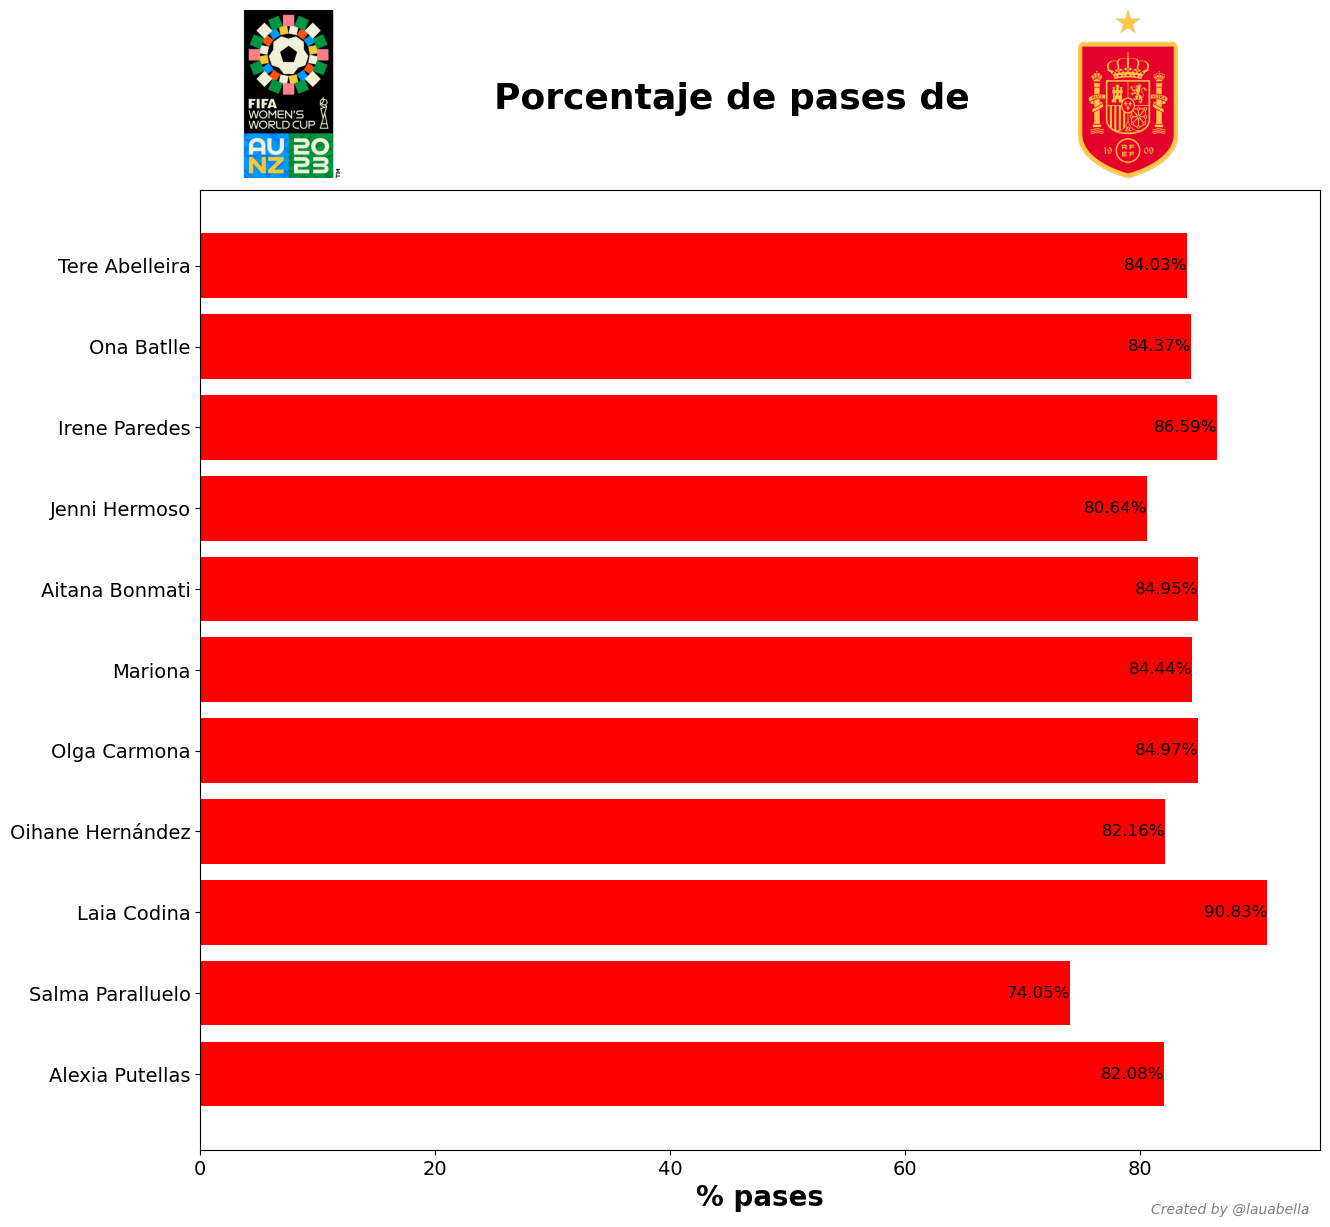

In [17]:
# The data for these passes can be displayed by either graphing the percentage

fig = plt.figure(figsize=(14, 12))
ax = plt.axes()

# The colour of the bar will be changed from the default colour.

bars = ax.barh(top_11_porcentaje['player'],top_11_porcentaje['Porcentaje %'], color='red')

# Passing percentage per player is now inserted.

for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}%', va='center', ha='right', fontsize=12, color='black')

plt.ylabel("")
plt.xlabel("% pases",fontsize=20, fontweight='bold')
fig.suptitle('Porcentaje de pases de',fontsize=26, fontweight='bold', x=0.48,y=0.99)
plt.text(0.99, -0.07, 'Created by @lauabella', fontsize=10, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Changes the size of the bar labels

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# World Cup and national team logo added

add_image(worldcup, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)
add_image(spain, fig, left=0.70, bottom=0.91, width=0.125, height=0.14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

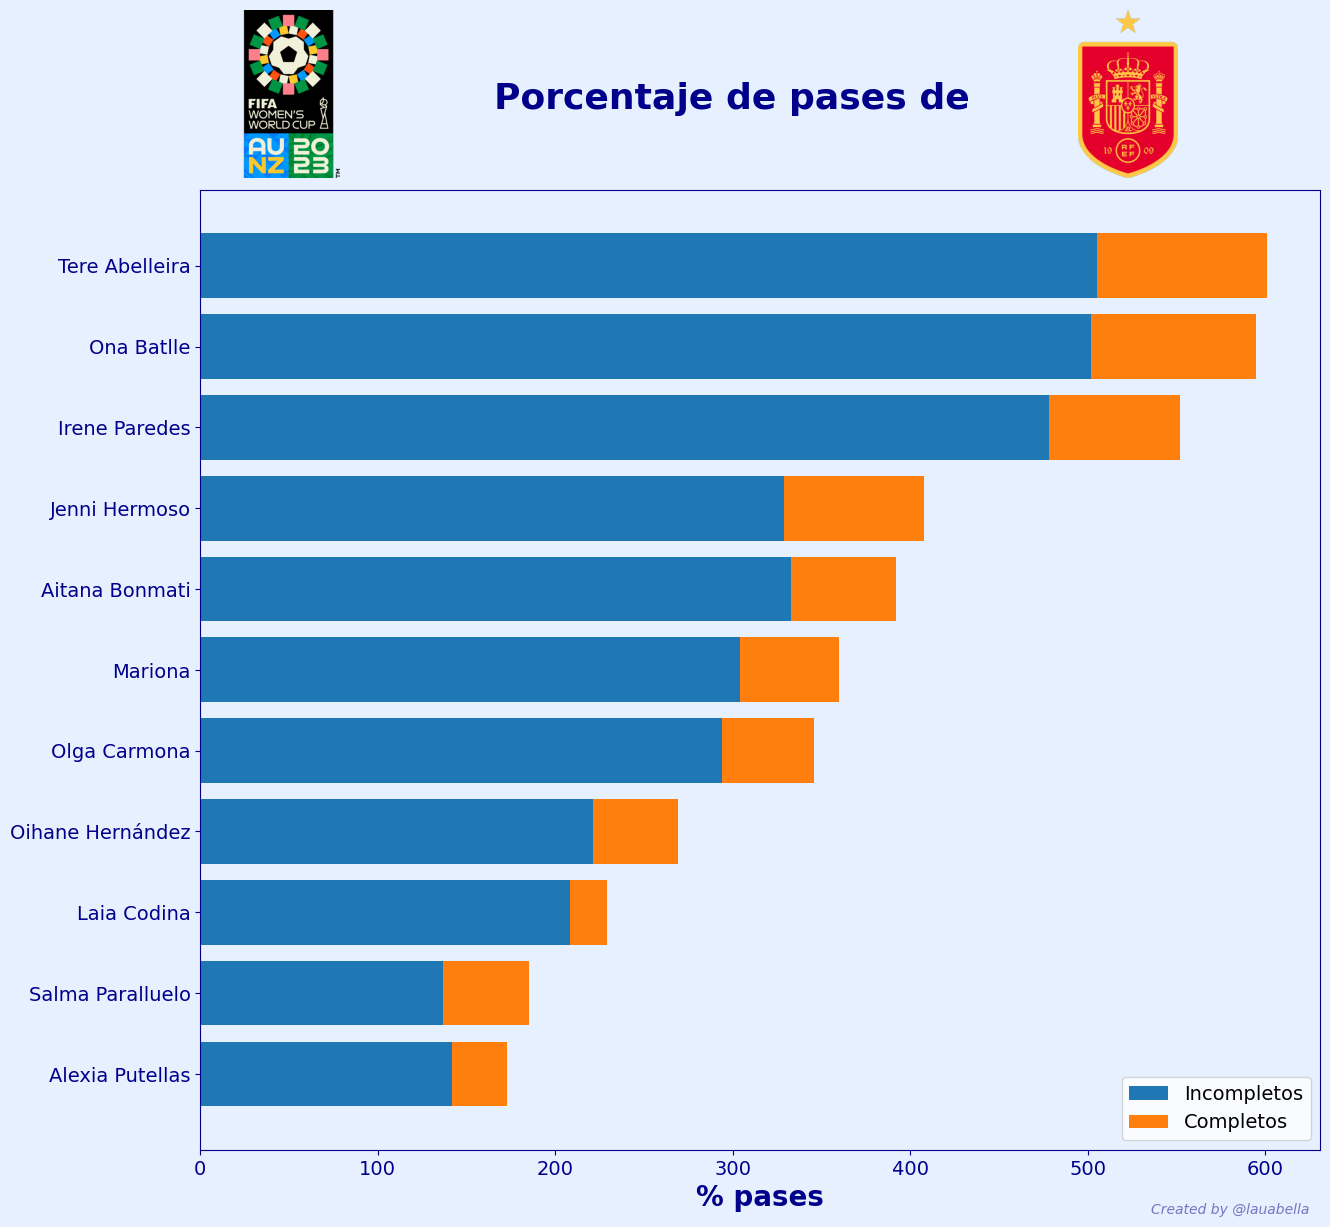

In [18]:
# To see two variables of the same category on the same graph we can use ‘stacked bars’ or ‘stack graphs’.
# Of all the passes, the complete and incomplete ones in the same image and with two different visualisations.

# In this case, the background colours, axes and lettering have also been changed.

fig = plt.figure(figsize=(14, 12))
ax = plt.axes()
ax.barh(top_11_porcentaje['player'],top_11_porcentaje['completos'], label='Incompletos')
ax.barh(top_11_porcentaje['player'],top_11_porcentaje['incompletos'], left=top_11_porcentaje['completos'], label='Completos')

# Sets the background to light blue

fig.patch.set_facecolor('#E6F0FF') 
ax.set_facecolor('#E6F0FF')

# Change the colour of the axes

ax.spines['bottom'].set_color('darkblue')  # Cambia el color del eje x
ax.spines['left'].set_color('darkblue')   # Cambia el color del eje y
ax.spines['top'].set_color('darkblue')   # Cambia el color del lado superior del eje
ax.spines['right'].set_color('darkblue')   # Cambia el color del lado derecho del eje

plt.ylabel("")
plt.xlabel("% pases",fontsize=20, fontweight='bold', color='darkblue')
fig.suptitle('Porcentaje de pases de',fontsize=26, fontweight='bold', color='darkblue',x=0.48,y=0.99)
plt.text(0.99, -0.07, 'Created by @lauabella', color='darkblue', fontsize=10, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Changes the size of the bar labels

ax.tick_params(axis='y', labelsize=14,colors='darkblue')
ax.tick_params(axis='x', labelsize=14,colors='darkblue')

ax.legend(fontsize=14)

# World Cup and national team logo added

add_image(worldcup, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)
add_image(spain, fig, left=0.70, bottom=0.91, width=0.125, height=0.14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

In [19]:
# Now we will create a function that creates a heat map and a pass map for each player

def passMapflech(player):
    
    player=player
    
    # Filtering the passes of the selected player only
    
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # drawing the football pitch
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Plotting the arrows of the player's passes
    
    pitch.arrows(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='green', ax=ax, zorder=2, label = "Pase completado")
    pitch.arrows(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='red', ax=ax, zorder=2, label = "Pase fallado")

    # coloured labels
    
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=14, bbox_to_anchor=(0.75, 0.95))

    # title
    
    ax_title = ax.set_title('Pases de ' f'{player}', fontsize=30,color='black')
    
    plt.show()
    

def passMap(player):
    
    player=player
    
    # Filtering the passes of the selected player only
    
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # drawing the football pitch
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Counting passes by zone and x & y coordinates of pass endings for the heat map.
    
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap='OrRd')

    # title
    
    ax_title = ax.set_title('Mapa de calor de ' f'{player}', fontsize=30,color='black')
    
    plt.show()

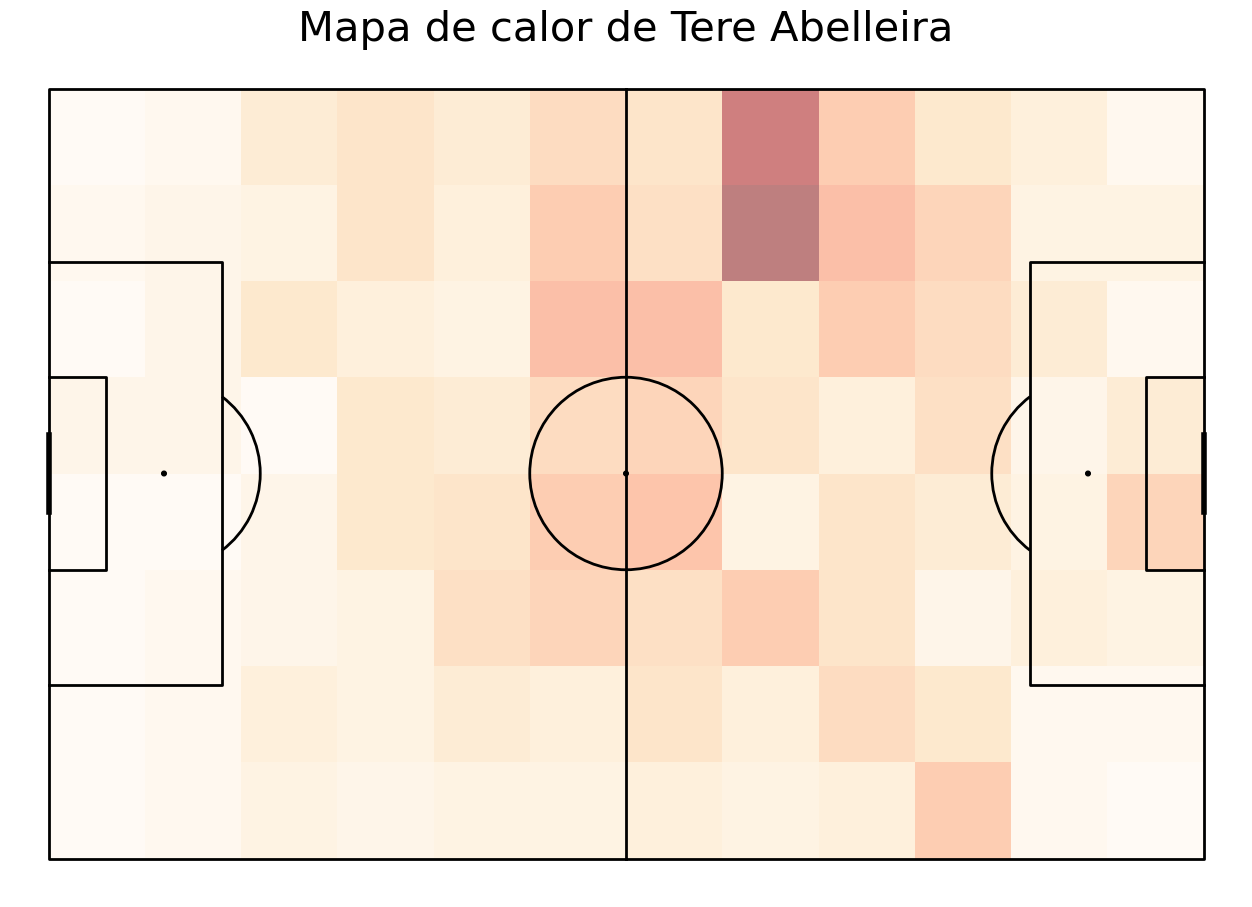

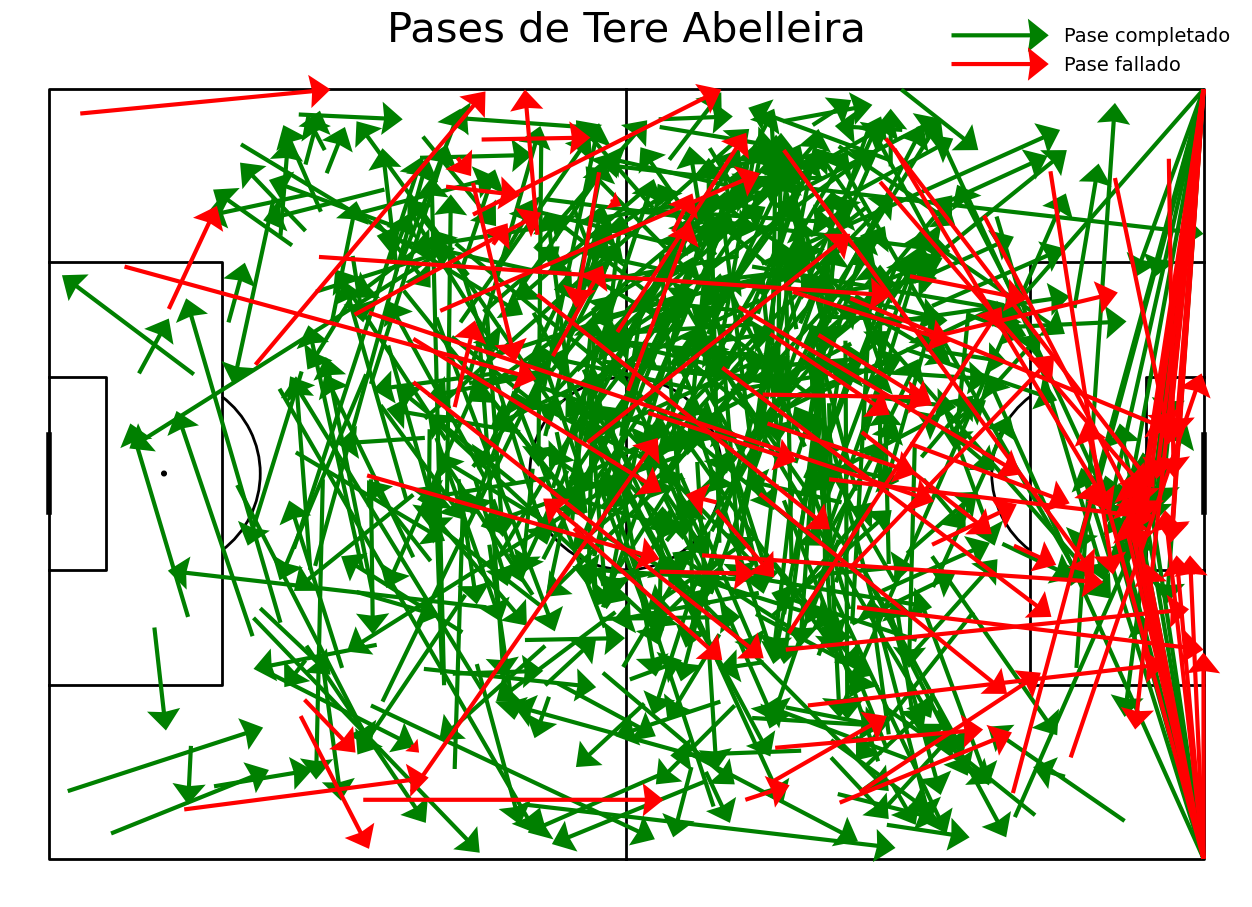

In [20]:
# A player is selected to view her heat map and pass map

passMap('Tere Abelleira')
passMapflech('Tere Abelleira')

In [21]:
# The above code will now be modified a little because a photo of this player will be added

def passMapflech1(player):
    
    player=player
    
    # Filtering the passes of the selected player only
    
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # drawing the football pitch
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Plotting the arrows of the player's passes
    
    pitch.arrows(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='green', ax=ax, zorder=2, label = "Pase completado")
    pitch.arrows(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='red', ax=ax, zorder=2, label = "Pase fallado")

    # coloured labels
    
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=14)

    # title
    
    ax_title = ax.set_title('Pases de ' f'{player}', fontsize=40,color='black')
    
    ax.legend(fontsize=16)

    # The logo of the World Cup, the national team and the player are added
    
    add_image(spain, fig, left=0.12, bottom=0.88, width=0.125, height=0.14)
    add_image(worldcup, fig, left=0.79, bottom=0.85, width=0.125, height=0.14)
    
    player_image_path = path + f"{player}.png"
    jugadora = plt.imread(player_image_path)
    add_image(jugadora, fig, left=-0.27, bottom=0.15, width=0.60, height=0.60)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    
    plt.show()
    

def passMap1(player):
    
    player=player
    
    # Filtering the passes of the selected player only
    
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # drawing the football pitch
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Counting passes by zone and x & y coordinates of pass endings for the heat map
    
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap='OrRd')

    # title
    
    ax_title = ax.set_title('Mapa de calor de ' f'{player}', fontsize=40,color='black')
    
    # The logo of the World Cup, the national team and the player are added
    
    add_image(spain, fig, left=0.12, bottom=0.85, width=0.125, height=0.14)
    add_image(worldcup, fig, left=0.79, bottom=0.85, width=0.125, height=0.14)
    
    player_image_path = path + f"{player}.png"
    jugadora = plt.imread(player_image_path)
    add_image(jugadora, fig, left=-0.27, bottom=0.15, width=0.60, height=0.60)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)    
    
    
    plt.show()

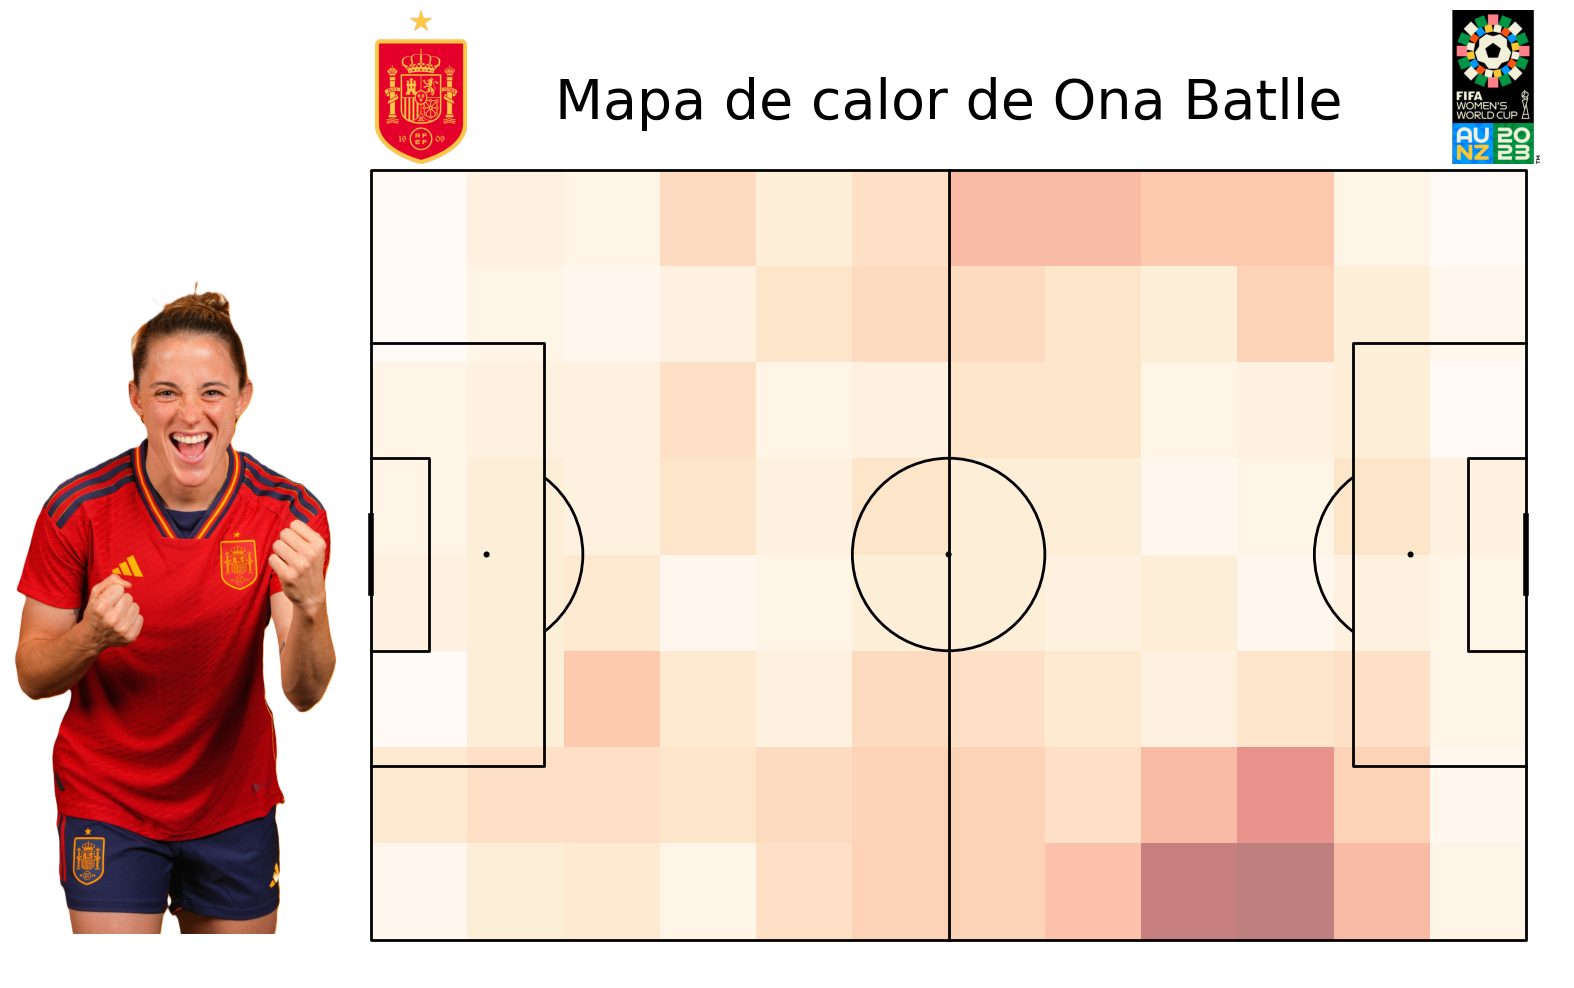

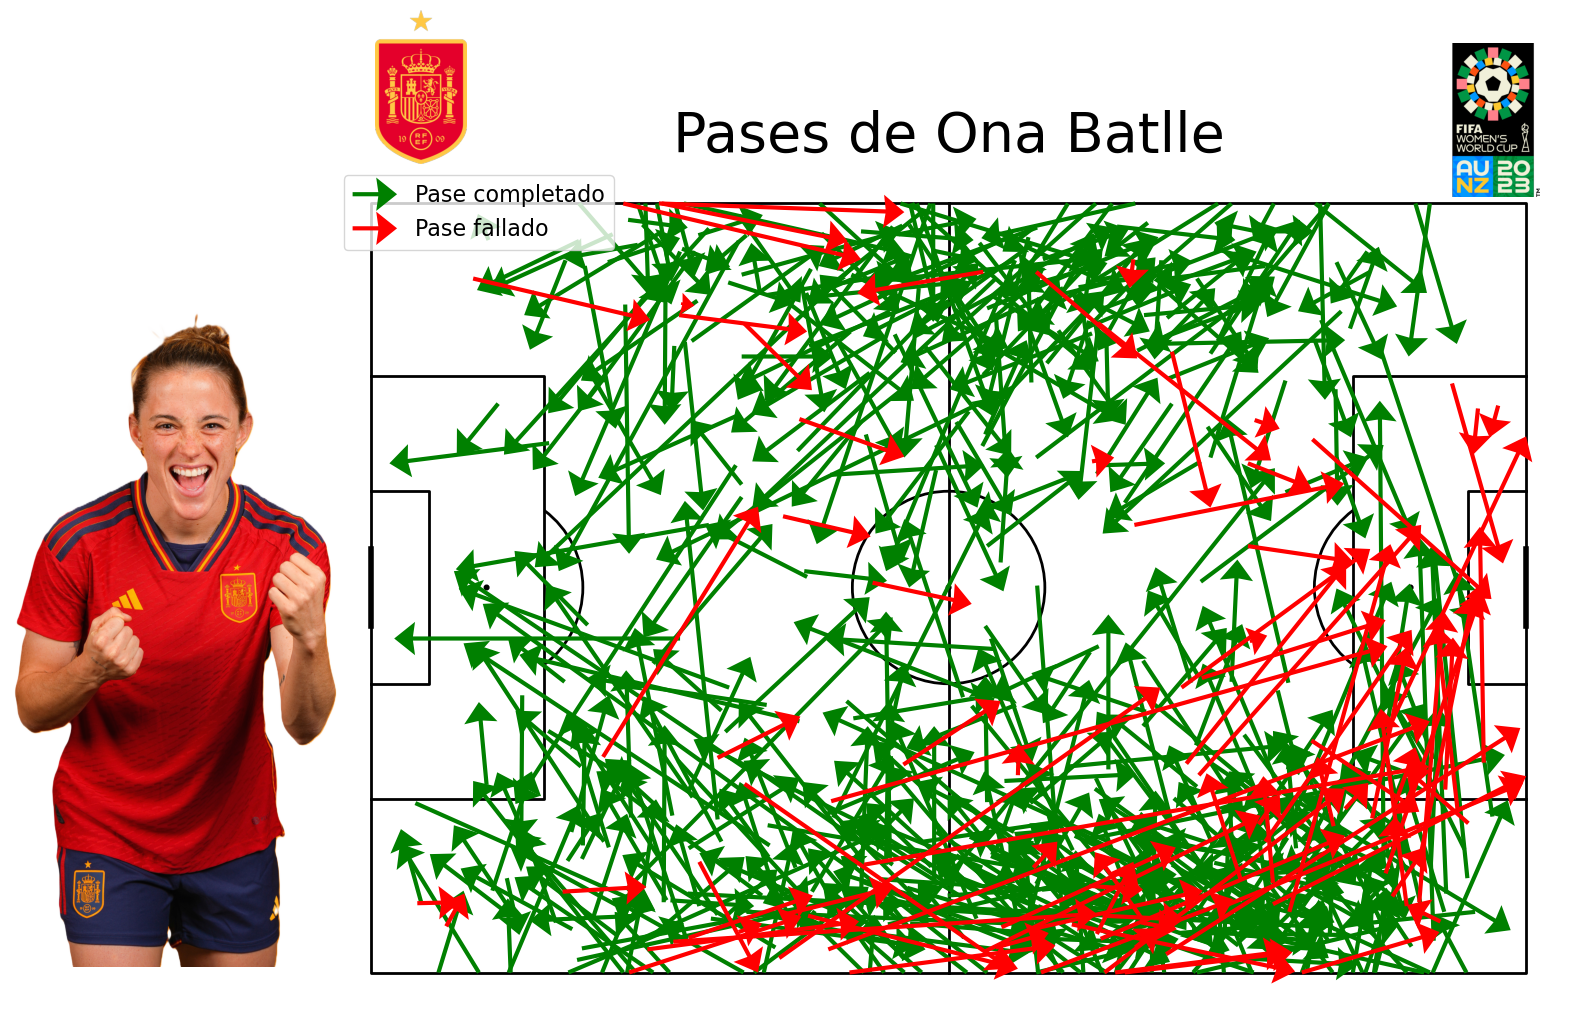

In [22]:
# Another player is selected to view her heat map and pass map

passMap1('Ona Batlle')
passMapflech1('Ona Batlle')

In [23]:
# And if you join the two graphs into one you get

def passMap(player):
    
    player=player
    
    # Filtering the passes of the selected player only
    
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # drawing the football pitch
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Counting passes by zone and x & y coordinates of pass endings for the heat map
    
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap='OrRd')

    # Graphing the arrows of the player's passes
    
    pitch.arrows(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='green', ax=ax, zorder=2, label = "Pase completado")
    pitch.arrows(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, width=3,
    headwidth=8, headlength=5, color='red', ax=ax, zorder=2, label = "Pase fallado")

    # coloured labels
    
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=16, loc='best')

    # title
    
    ax_title = ax.set_title('Pases de ' f'{player}', fontsize=40,color='black')
    
    # The logo of the World Cup, the national team and the player are added
    
    add_image(worldcup, fig, left=0.12, bottom=0.85, width=0.125, height=0.14)
    add_image(spain, fig, left=0.79, bottom=0.88, width=0.125, height=0.14)
    
    player_image_path = path + f"{player}.png"
    jugadora = plt.imread(player_image_path)
    add_image(jugadora, fig, left=-0.35, bottom=0.15, width=0.60, height=0.60)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) 
    
    plt.show()

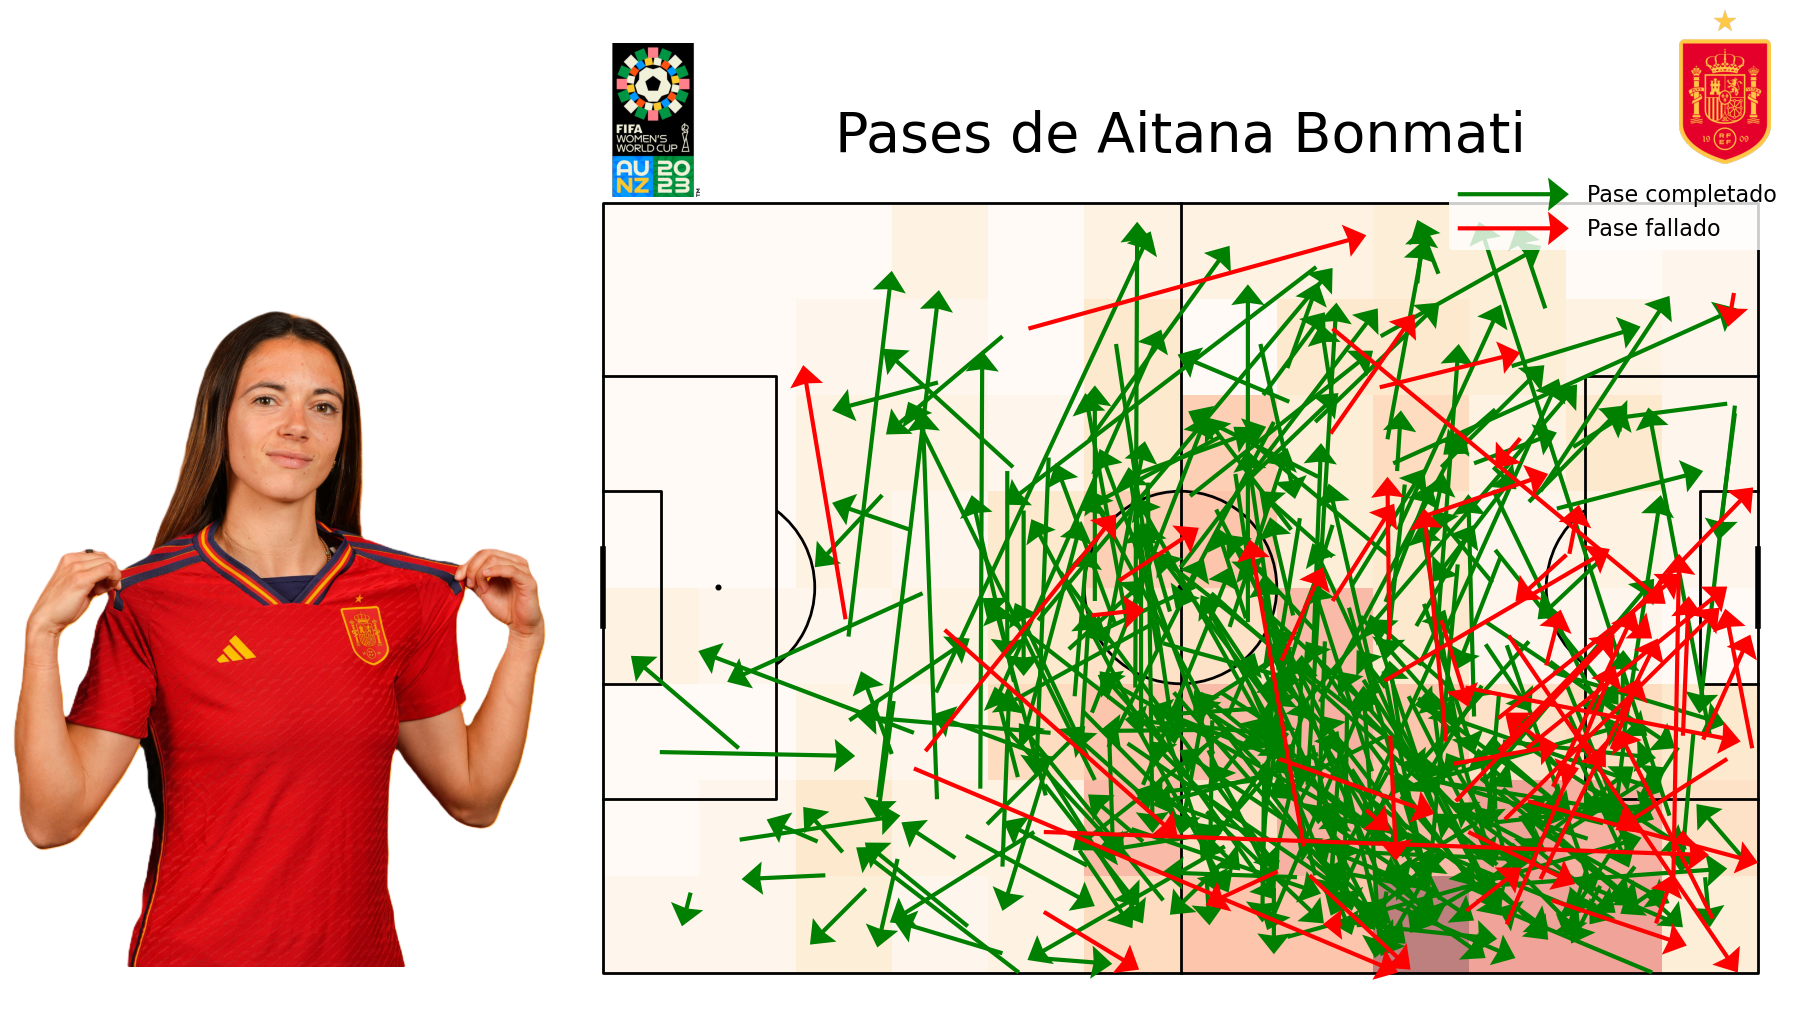

In [24]:
passMap('Aitana Bonmati')